The big difference in adding an extra dimension to make our simulation 2-dimensional is in the points that we calculate the partial derivative of velocity with respect to time at - instead of a line, this becomes a grid of x and y cooridnates. We also gain another term, $\frac{\delta u}{\delta y}$

This means that the 2D convection equation is as follows:

$$\frac{\delta u}{\delta t} + c \frac{\delta u}{\delta x} + c \frac{\delta u}{\delta y}$$

Which can be discretised:

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + c \frac{u_{i,j}^n - u_{i-1,j}^n}{\Delta x} + c \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y}$$

Finally, we solve this for our unknown ($u_{i,j}^{n+1}$)

$$u_{i,j}^{n+1} = u_{i,j}^n - c \frac{\Delta t}{\Delta x} (u_{i,j}^n - u_{i-1,j}^n) - c \frac{\Delta t}{\Delta y} (u_{i,j}^n - u_{i,j-1}^n)$$

In this case, we define the initial and boundary conditions as follows:

Initial condition:

$u(x,y) = 2 $ for $x \geq 0.5$ and $y \leq 1$

$u(x,y) = 1 $ elsewhere


Boundary condition:

$u = 1$ on all boundaries ($x=0,2$, $y=0,2$)

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Declare parameter variables

nx = 81 #Number of x points
ny = 81 #Number of y points
steps = 100 #Number of time steps to simulate
c = 1 #Wave speed
dx = 2 / (nx - 1) #Difference in x between x points
dy = 2 / (ny - 1) #Difference in y between y points
sigma = .2 #Not sure yet - defines the time step
dt = sigma * dx #Difference in time between time steps

#Create grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#Holds current grid conditions in a matrix
u = np.ones((ny, nx))

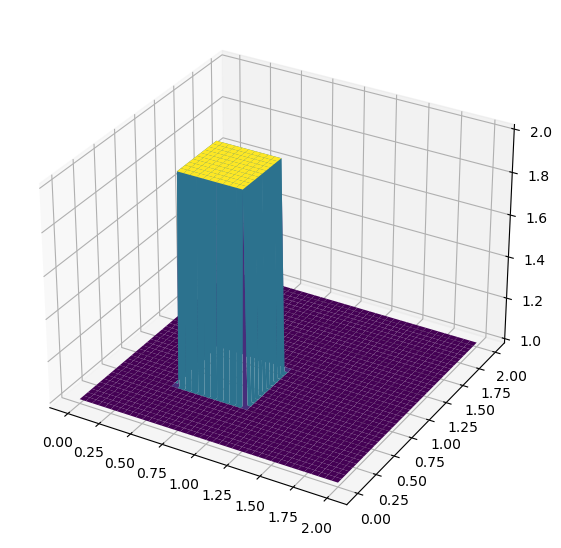

In [3]:
#Initial conditions

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

#Display intial condition
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [4]:
#Update code
def update(u, c, dt, dx, dy):
    unext = u.copy()
    
    #Update with update rule and numpy matrix operations
    unext[1:, 1:] = (u[1:, 1:] - (c * dt / dx * (u[1:, 1:] - u[1:, :-1])) -
                              (c * dt / dy * (u[1:, 1:] - u[:-1, 1:])))    
    #Specify boundary conditions
    
    unext[0,:] = 1
    unext[-1,:] = 1
    unext[:,0] = 1
    unext[:,-1] = 1
    
    return unext

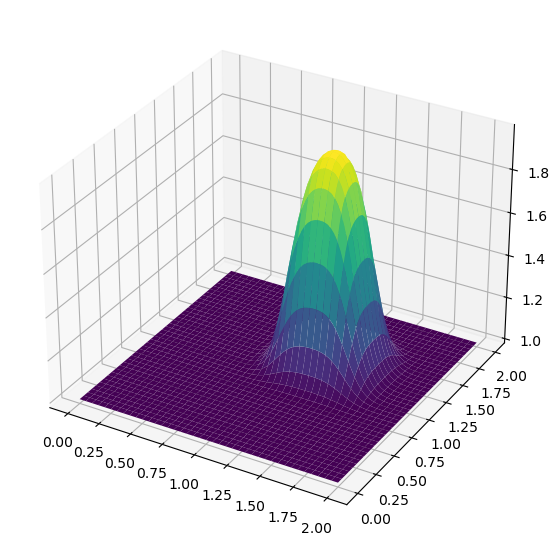

In [5]:
#Update code
for i in range(steps):
    u = update(u, c, dt, dx, dy)



#Plot
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

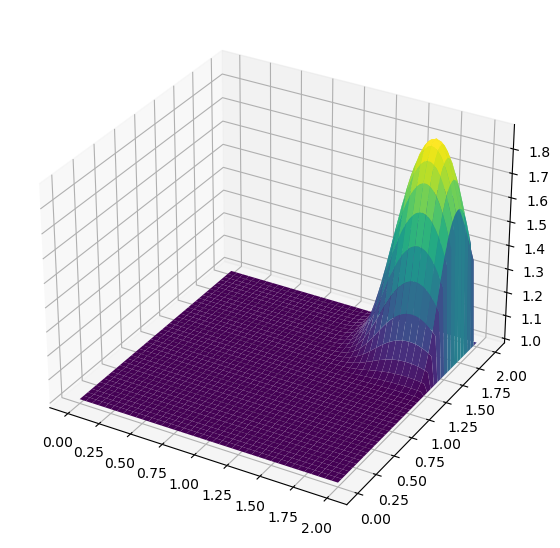

In [6]:
#Update code
for i in range(steps):
    u = update(u, c, dt, dx, dy)



#Plot
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)